In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df_sleep = pd.read_csv('sleep.csv')
df_steps = pd.read_csv('steps.csv')


In [3]:
df_sleep.head()

,Timestamp,Minutes Asleep,Sleep Type
0,2022-05-25T00:00:00.000,31,light
1,2022-05-25T00:31:00.000,16,rem
2,2022-05-25T00:47:00.000,19,light
3,2022-05-25T01:06:00.000,22,deep
4,2022-05-25T01:28:00.000,25,light


In [4]:
df_steps.head()

,datetime,steps
0,25/05/22 0:00,NaN
1,25/05/22 0:01,NaN
2,25/05/22 0:02,0.0
3,25/05/22 0:03,0.0
4,25/05/22 0:04,0.0


In [5]:
for i in range(len(df_sleep['Timestamp'])):
    df_sleep['Timestamp'][i]= str(df_sleep['Timestamp'][i]).replace('T', ' ')

/var/folders/s1/rf4gbymj7_x8bd7ts3__3cwc0000gn/T/ipykernel_39751/1755105402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep['Timestamp'][i]= str(df_sleep['Timestamp'][i]).replace('T', ' ')


In [6]:
df_sleep.head()

,Timestamp,Minutes Asleep,Sleep Type
0,2022-05-25 00:00:00.000,31,light
1,2022-05-25 00:31:00.000,16,rem
2,2022-05-25 00:47:00.000,19,light
3,2022-05-25 01:06:00.000,22,deep
4,2022-05-25 01:28:00.000,25,light


In [7]:
df_sleep['Timestamp'] = pd.to_datetime(df_sleep['Timestamp'], format = "%Y/%m/%d %H:%M:%S.%f") 

In [8]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       33 non-null     datetime64[ns]
 1   Minutes Asleep  33 non-null     int64         
 2   Sleep Type      33 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 920.0+ bytes


In [9]:
df_steps['datetime'] = pd.to_datetime(df_steps['datetime'], format = "%d/%m/%y %H:%M") 

In [10]:
df_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  1440 non-null   datetime64[ns]
 1   steps     1438 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.6 KB


In [11]:
df_steps['steps'].isnull().sum()

2

In [12]:
df_steps['steps'] = df_steps['steps'].fillna(0)


In [13]:
ts = df_sleep['Timestamp'][32] 
print(ts)

2022-05-25 07:50:00


In [14]:
df_steps = df_steps.loc[(df_steps.datetime <ts) ,:]

In [15]:
df_steps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 469
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  470 non-null    datetime64[ns]
 1   steps     470 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.0 KB


In [16]:
df_sleep['Sleep Type'].value_counts()

light    16
wake      8
deep      6
rem       3
Name: Sleep Type, dtype: int64

In [17]:
(df_sleep['Minutes Asleep'].sum())/60

7.866666666666666

In [18]:
light_sleep=0
wake_sleep = 0
deep_sleep = 0
rem_sleep = 0


In [19]:
for i in range(len(df_sleep['Minutes Asleep'])):
    if (df_sleep['Sleep Type'][i] == 'light'):
        light_sleep+= df_sleep['Minutes Asleep'][i]
    elif (df_sleep['Sleep Type'][i] == 'wake'):
        wake_sleep+= df_sleep['Minutes Asleep'][i]
    elif (df_sleep['Sleep Type'][i] == 'deep'):
        deep_sleep+= df_sleep['Minutes Asleep'][i]
    elif (df_sleep['Sleep Type'][i] == 'rem'):
        rem_sleep+= df_sleep['Minutes Asleep'][i]

In [20]:
print('Subjects sleeps lightly for about' , light_sleep/ df_sleep['Minutes Asleep'].sum()*100 , "% of the time" )
print('Subjects sleeps deeply for about' , deep_sleep/ df_sleep['Minutes Asleep'].sum()*100 , "% of the time" )
print('Subjects rem sleeps for about' , rem_sleep/ df_sleep['Minutes Asleep'].sum()*100 , "% of the time" )

print('Subjects is awake for about' , wake_sleep/ df_sleep['Minutes Asleep'].sum()*100 , "% of the time" )


Subjects sleeps lightly for about 50.42372881355932 % of the time
Subjects sleeps deeply for about 17.796610169491526 % of the time
Subjects rem sleeps for about 17.796610169491526 % of the time
Subjects is awake for about 13.983050847457626 % of the time


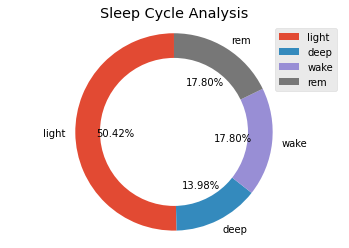

In [21]:
labels = ['light', 'deep', 'wake', 'rem']
share = [light_sleep , wake_sleep, deep_sleep , rem_sleep ]
plt.style.use('ggplot')
plt.title('Sleep Cycle Analysis')
plt.pie(x=share, labels=labels, autopct='%.2f%%',startangle=90)
plt.axis('equal')
plt.legend(loc='upper right')
circle = plt.Circle(xy=(0,0), radius=.75, facecolor='white')
plt.gca().add_artist(circle)
plt.show()

In [22]:
df_sleep['Timestamp'] = df_sleep['Timestamp'] - pd.to_timedelta(df_sleep['Timestamp'].dt.second, unit='s')

In [23]:
df_sleep['Timestamp']

0    2022-05-25 00:00:00
1    2022-05-25 00:31:00
2    2022-05-25 00:47:00
3    2022-05-25 01:06:00
4    2022-05-25 01:28:00
5    2022-05-25 01:53:00
6    2022-05-25 01:57:00
7    2022-05-25 02:10:00
8    2022-05-25 02:22:00
9    2022-05-25 02:24:00
10   2022-05-25 02:38:00
11   2022-05-25 02:46:00
12   2022-05-25 02:50:00
13   2022-05-25 03:05:00
14   2022-05-25 03:28:00
15   2022-05-25 03:52:00
16   2022-05-25 04:01:00
17   2022-05-25 04:12:00
18   2022-05-25 04:16:00
19   2022-05-25 04:21:00
20   2022-05-25 04:23:00
21   2022-05-25 04:31:00
22   2022-05-25 05:08:00
23   2022-05-25 05:21:00
24   2022-05-25 05:37:00
25   2022-05-25 05:43:00
26   2022-05-25 06:06:00
27   2022-05-25 07:04:00
28   2022-05-25 07:16:00
29   2022-05-25 07:22:00
30   2022-05-25 07:35:00
31   2022-05-25 07:44:00
32   2022-05-25 07:50:00
Name: Timestamp, dtype: datetime64[ns]

In [24]:
steps_walked_list = []
print(df_sleep['Timestamp'][7])
print(df_steps['datetime'][130])


2022-05-25 02:10:00
2022-05-25 02:10:00


In [25]:
for i in range(len(df_sleep['Sleep Type'])):
    if (df_sleep['Sleep Type'][i]== 'wake'):
        ts = df_sleep['Timestamp'][i]
        mins = df_sleep['Minutes Asleep'][i]
        for j in range(len(df_steps['steps'])):
            if(ts == df_steps['datetime'][j]):
                steps_walked = 0
                for k in range(j , j+mins+1):
                    steps_walked+= df_steps['steps'][k]
                steps_walked_list.append(steps_walked)

In [26]:
steps_walked_list

[0.0, 22.0, 135.0, 10.0, 10.0, 57.0, 0.0]

In [27]:
timestamp_wake = []

In [28]:
for i in range(0,33):
    if(df_sleep['Sleep Type'][i] == 'wake'):
        timestamp_wake.append(df_sleep['Timestamp'][i])

In [29]:
timestamp_wake = timestamp_wake[:-1]
#removing the last element as it is the time at which the test subject has finally woke up from his sleep

In [30]:
timestamp_wake

[Timestamp('2022-05-25 01:53:00'),
 Timestamp('2022-05-25 02:10:00'),
 Timestamp('2022-05-25 02:24:00'),
 Timestamp('2022-05-25 02:50:00'),
 Timestamp('2022-05-25 04:16:00'),
 Timestamp('2022-05-25 05:37:00'),
 Timestamp('2022-05-25 07:16:00')]

In [31]:
df_wake = pd.DataFrame({'Timestamp': timestamp_wake ,'Steps walked':steps_walked_list ,})

In [32]:
df_wake.head()

,Timestamp,Steps walked
0,2022-05-25 01:53:00,0.0
1,2022-05-25 02:10:00,22.0
2,2022-05-25 02:24:00,135.0
3,2022-05-25 02:50:00,10.0
4,2022-05-25 04:16:00,10.0


<AxesSubplot:xlabel='Timestamp', ylabel='Steps walked'>

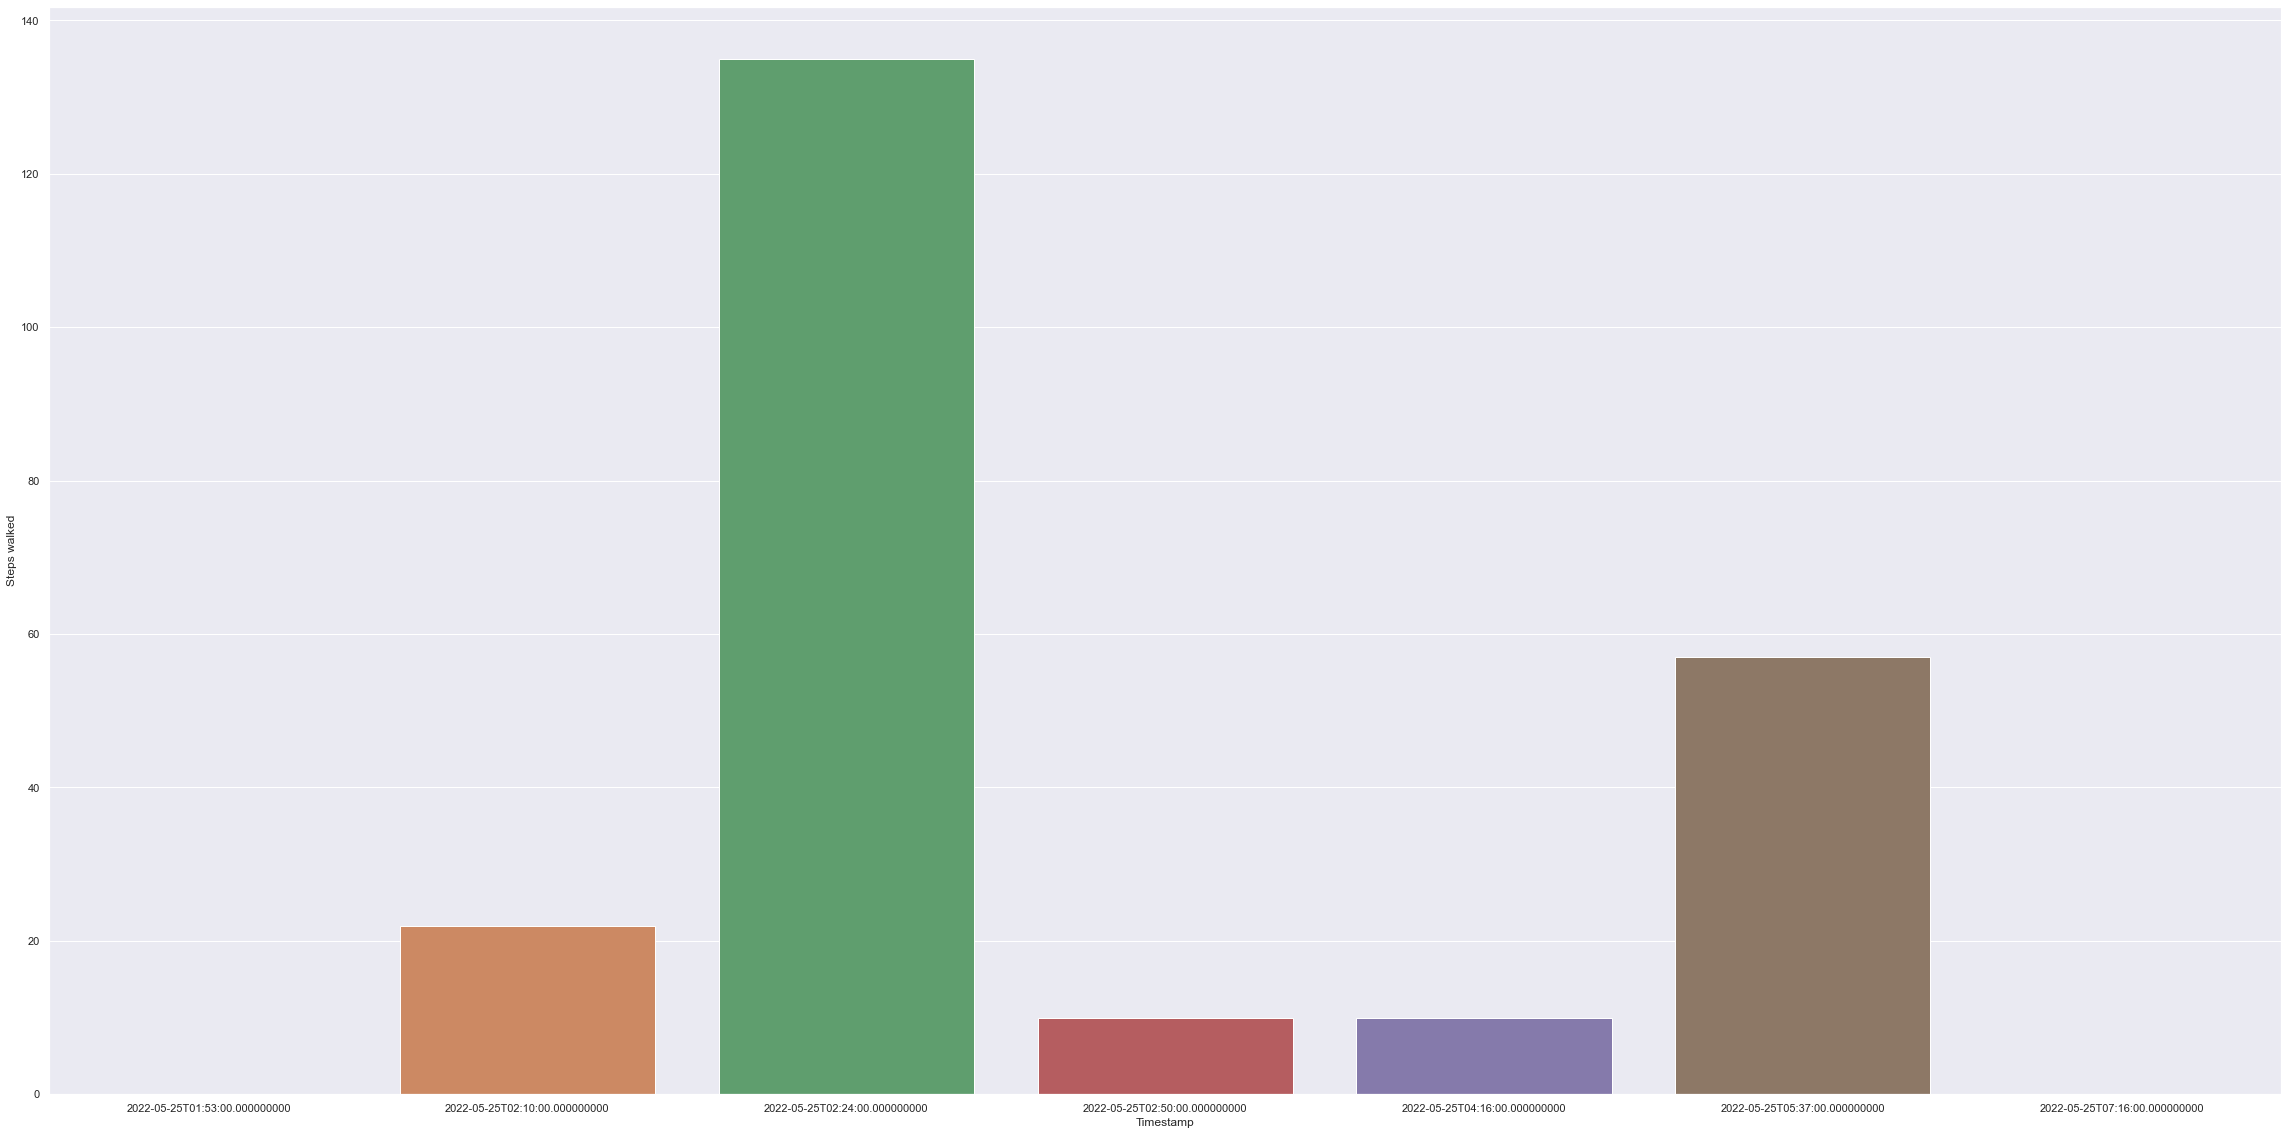

In [33]:
sns.set(rc={'figure.figsize':(40,20)})
sns.barplot(data=df_wake, x="Timestamp", y="Steps walked")